<H1 style = 'text-align: center; color: green;'><b>Electronics Gadget Sales Analysis</b></h1><br>By OLUWADAMILARE JACOB

### [Problem Statement](trygfs)

Blord Group is seeking to find the sales activities and performance in the phone and accesories<br>department of Blord Group, find the yearly sales trend the average and return in one year period<br> the product with highest order by country or city, respectives KPIs and other relevant insights

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the dataset into a list
data = [
    'Sales_April_2019.csv',
    'Sales_August_2019.csv',
    'Sales_December_2019.csv',
    'Sales_February_2019.csv',
    'Sales_January_2019.csv',
    'Sales_July_2019.csv',
    'Sales_June_2019.csv',
    'Sales_March_2019.csv',
    'Sales_May_2019.csv',
    'Sales_November_2019.csv',
    'Sales_October_2019.csv',
    'Sales_September_2019.csv']

In [4]:
# count the tottal number of files 
print('No of Files:',len(data))

No of Files: 12


In [5]:
# use pandas to read the loaded data by looping
dt = [pd.read_csv(d) for d in data]
# concat the files
df = pd.concat(dt)
# check the df or data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
# check the total sales
df.shape

(186850, 6)

# `Data Preprocessing`

In [7]:
# check for generai infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [8]:
# check missing values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
# drop or remove missing rows
df.dropna(how='all',inplace=True)

In [10]:
# check for duplicate
df.duplicated().sum()

np.int64(618)

In [11]:
# number of rows and colunms
df.shape

(186305, 6)

In [12]:
# reomve duplicates immediately
df.drop_duplicates(inplace=True)

In [13]:
# convert numerical colunms into integer and float
# filter out the rows with headers
df = df[df['Quantity Ordered'].str.isdigit()] # remove rows where header is reapeated
# convert to int
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
# check if it has change
df['Quantity Ordered'].dtype

dtype('int64')

In [14]:
# filter out the rows with headers
df = df[df['Price Each'].str.isdigit()] # remove rows where header is reapeated
# convert to int
df['Price Each'] = df['Price Each'].astype('float')
# check if it has change
df['Price Each'].dtype

dtype('float64')

In [15]:
# filter out the rows with headers
df = df[df['Order ID'].str.isdigit()] # remove rows where header is reapeated
# convert to int
df['Order ID'] = df['Order ID'].astype('int')
# check if it has change
df['Order ID'].dtype

dtype('int64')

In [16]:
# Convert order date to python datatime
df['Order Date'] =pd.to_datetime(df['Order Date'], errors='coerce')

` Add New Columns For Analysis`

In [17]:
# add month col
df['Month'] = df['Order Date'].dt.month_name()
df.head() # check

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April


In [18]:
# add day name 
df['Day'] = df['Order Date'].dt.day_name()
df.head() # check

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,Wednesday
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April,Thursday
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April,Thursday
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday


In [19]:
# add order time col
df['Order Time'] = df['Order Date'].dt.time
df.head() # check

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Order Time
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,14:38:00
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,Wednesday,10:38:00
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April,Thursday,17:18:00
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April,Thursday,20:30:00
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,19:42:00


In [20]:
# add a new col for amount
df['Amount'] = (df['Quantity Ordered'] * df['Price Each']).round(2)
df.head() # check 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Order Time,Amount
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,14:38:00,600.0
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,Wednesday,10:38:00,1700.0
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April,Thursday,17:18:00,600.0
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April,Thursday,20:30:00,150.0
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,19:42:00,600.0


In [21]:
# extract city from the address
df['City'] = df['Purchase Address'].apply(lambda city : city.split(',')[-2])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Order Time,Amount,City
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,14:38:00,600.0,Los Angeles
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,Wednesday,10:38:00,1700.0,San Francisco
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",April,Thursday,17:18:00,600.0,Los Angeles
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",April,Thursday,20:30:00,150.0,New York City
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,19:42:00,600.0,Los Angeles


`Weekly Sales Trend`

In [22]:
# group by amount by day of the week
weekly = df.groupby('Day')['Amount'].sum()
weekly

Day
Friday       2903750.0
Monday       2958100.0
Saturday     2929000.0
Sunday       2954850.0
Thursday     2857350.0
Tuesday      3100700.0
Wednesday    2946250.0
Name: Amount, dtype: float64

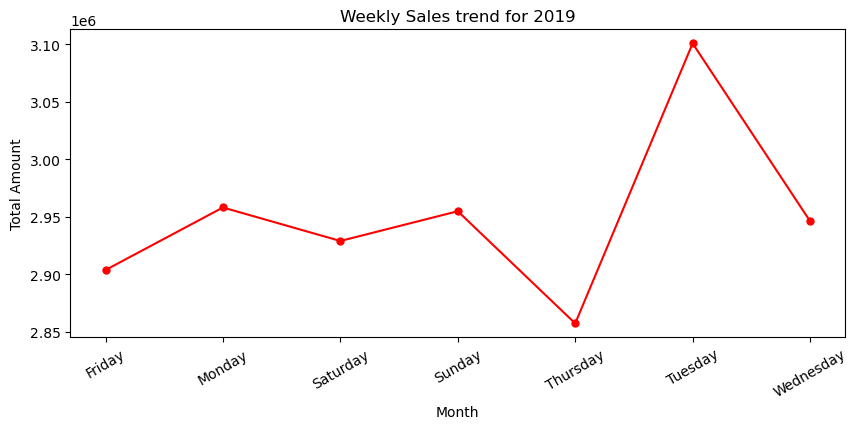

In [23]:
# visualize the trend
plt.figure(figsize=(10,4))
weekly.plot(kind='line', color='red', marker='o', markersize='5')
plt.title('Weekly Sales trend for 2019')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=30)
plt.show()


`Product Sales Performance by Total Orders and Amount`

In [24]:
#  product perf
# groupby average aggregate
per =df.groupby('Product')[['Amount','Quantity Ordered']].sum().sort_values(by = 'Quantity Ordered', ascending=False)
per

,Amount,Quantity Ordered
Product,,
Apple Airpods Headphones,2330700.0,15538
iPhone,4766300.0,6809
Google Phone,3296400.0,5494
Flatscreen TV,1437900.0,4793
Macbook Pro Laptop,7995100.0,4703
Vareebadd Phone,823600.0,2059


<Figure size 1000x400 with 0 Axes>

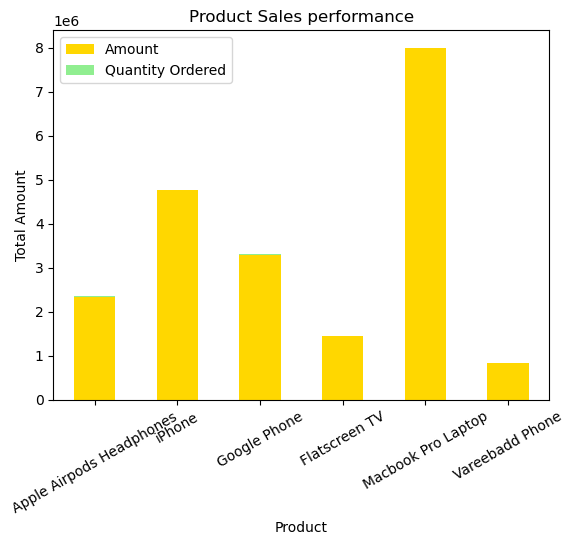

In [25]:
# visualize the chart
# visualize the trend
plt.figure(figsize=(10,4))
per.plot(kind='bar', color=['gold','lightgreen'], stacked=True)
plt.title('Product Sales performance')
plt.xlabel('Product')
plt.ylabel('Total Amount')
plt.xticks(rotation=30)
plt.show()


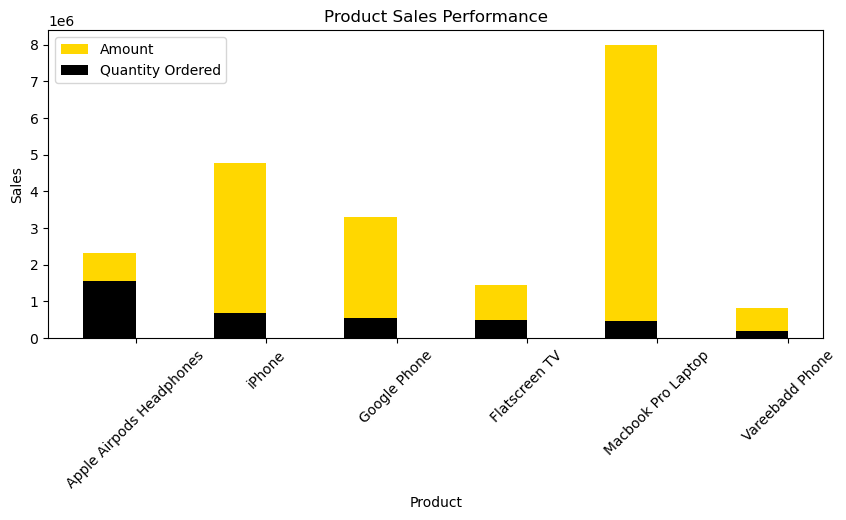

In [26]:
# get data for plotting
categories = per.index
# set abr position
x = np.arange(len(categories))
width = 0.4
# create fig and plot side by side 
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x - width/2, per['Amount'],width, label='Amount',color='gold')
ax.bar(x - width/2, per['Quantity Ordered']*100,width, label='Quantity Ordered',color='black')
# customize the plot
ax.set_xlabel('Product')
ax.set_ylabel('Sales')
ax.set_title('Product Sales Performance')
ax.set_xticks(x)
ax.legend()
ax.set_xticklabels(categories, rotation=45)
plt.show()

`City With The Highest Revenue`

<Axes: xlabel='City'>

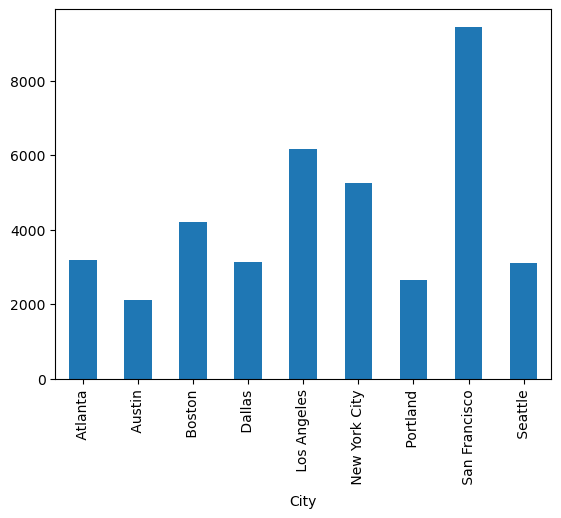

In [27]:
# the city with highest Performance
df.groupby('City')['City'].count().plot.bar()

In [28]:
# group city by amount
gd= df.groupby(['City','Product'])['Amount'].sum().unstack()
gd

Product,Apple Airpods Headphones,Flatscreen TV,Google Phone,Macbook Pro Laptop,Vareebadd Phone,iPhone
City,,,,,,
Atlanta,188400.0,121500.0,269400.0,640900.0,69200.0,380800.0
Austin,132000.0,71700.0,161400.0,425000.0,42800.0,260400.0
Boston,246300.0,165000.0,354000.0,812600.0,85600.0,525000.0
Dallas,177750.0,125400.0,274800.0,646000.0,70400.0,359800.0
Los Angeles,368100.0,216600.0,504600.0,1264800.0,126000.0,777700.0
New York City,312150.0,187800.0,451800.0,1111800.0,112000.0,614600.0
Portland,163200.0,93000.0,211800.0,569500.0,49600.0,312900.0
San Francisco,555600.0,344700.0,808800.0,1924400.0,196400.0,1156400.0
Seattle,187200.0,112200.0,259800.0,600100.0,71600.0,378700.0


<Figure size 1000x400 with 0 Axes>

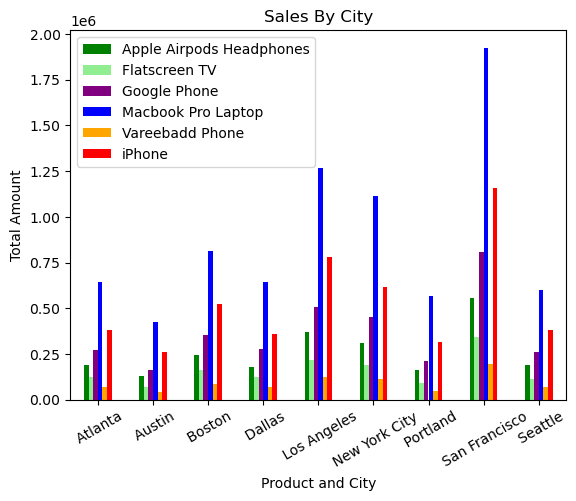

In [29]:
# visualize the chart
# visualize the trend
plt.figure(figsize=(10,4))
gd.plot(kind='bar', color=['green','lightgreen','purple','blue','orange','red'],stacked=False)
plt.title('Sales By City')
plt.xlabel('Product and City')
plt.ylabel('Total Amount')
plt.xticks(rotation=30)
plt.legend()
plt.show()


`Key Performance Metrics`

In [30]:
# measure kpis
Total_Products =df['Product'].nunique()
No_of_City =df['City'].nunique()
Quantity_Ordered =df['Quantity Ordered'].sum()
Revenue =df['Amount'].sum()

In [31]:
# print output
print('Total_Products', Total_Products, sep=':')
print('No_of_City',No_of_City, sep=':')
print('Quantity_Ordered', Quantity_Ordered, sep=':')
print('Revenue',Revenue, sep=':')

Total_Products:6
No_of_City:9
Quantity_Ordered:39396
Revenue:20650000.0
